In [5]:
#Reading the data
import pandas as pd 
import numpy as np 
data=pd.read_csv("RELIANCE.csv")
data.head(2)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.5,251.70,237.5,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.4,271.85,251.3,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN


In [38]:

data.describe(include='O')

2225


,Date,Symbol,Series
count,2225,2225,2225
unique,2225,1,1
top,2015-07-28,RELIANCE,EQ
freq,1,2225,2225


In [29]:
#Removing empty or null values
data.dropna(inplace=True)
data.isnull().sum()

Date          0
Symbol        0
Series        0
Prev Close    0
Open          0
High          0
Low           0
Last          0
Close         0
VWAP          0
Volume        0
Turnover      0
dtype: int64

In [39]:
#Creating data for prophet
X=data.drop(["Symbol","Series","VWAP"],axis=1)
X.head(2)


2225


,Date,Prev Close,Open,High,Low,Last,Close,Volume,Turnover
2850,2011-06-01,951.85,952.00,958.65,943.65,947.5,946.80,1838452,1.742538e+14
2851,2011-06-02,946.80,936.55,954.70,936.55,952.5,951.05,2152963,2.039039e+14


In [36]:
Y=data["VWAP"]
Y.head(2)

2850    947.83
2851    947.09
Name: VWAP, dtype: float64

In [40]:
train_data=pd.DataFrame()
train_data['ds']=pd.to_datetime(X["Date"])
train_data['y']=Y
train_data.head(2)

,ds,y
2850,2011-06-01,947.83
2851,2011-06-02,947.09


In [41]:
#Fitting data to prophrt
from fbprophet import Prophet
pro=Prophet()
pro.fit(train_data)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
#Creating values for future
future=pro.make_future_dataframe(periods=1000)
future.tail(2)

,ds
3223,2023-02-22
3224,2023-02-23


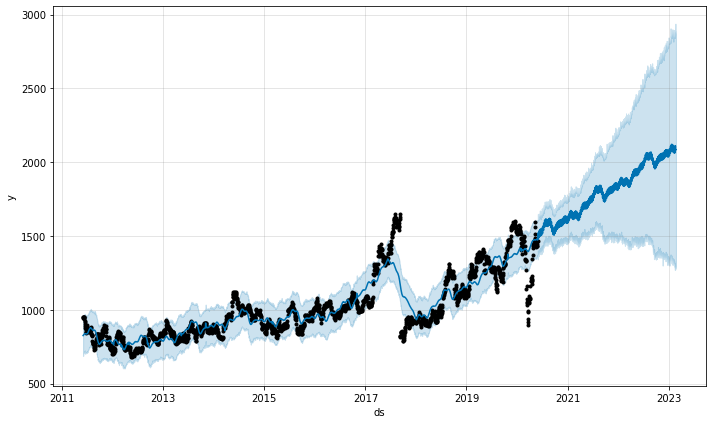

In [44]:
#Plotting the predicted data
forecast=pro.predict(future)
fig1=pro.plot(forecast)